In [117]:
from sympy import *
from sympy import sqrt
from sympy.matrices import *
from sympy.abc import *
init_printing()

In [118]:
khat = Symbol("\hat{k}")
khat

In [119]:
x, y, v, w, mu, sigma, alpha, k, eta_2, eta_1, b_1, b_2 = symbols("x y v w mu sigma alpha k eta_2 eta_1 b_1 b_2", real = True)

Consider determining the center manifold in the vicinity of $k=k_1$. After shifting, the equations are

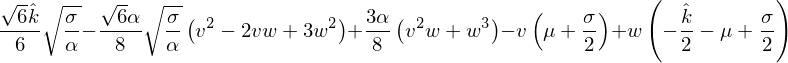

In [120]:
vprime = khat/2*sqrt((2*sigma)/(3*alpha))-(mu+sigma/2)*v+(sigma/2-mu-khat/2)*w-3*alpha/8*sqrt((2*sigma)/(3*alpha))*(v**2-2*v*w+3*w**2)+3*alpha/8*(v**2*w+w**3)
vprime

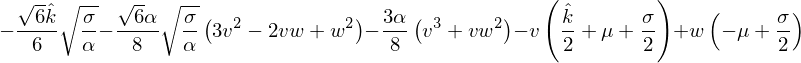

In [121]:
wprime = -khat/2*sqrt((2*sigma)/(3*alpha))-(mu+sigma/2+khat/2)*v+(sigma/2-mu)*w-3*alpha/8*sqrt((2*sigma)/(3*alpha))*(3*v**2-2*v*w+w**2)-3*alpha/8*(v**3+v*w**2)
wprime

Rotating coordinates, first by substituting $v= \eta_1 x+y$ and $w= \eta_2 x+y$  

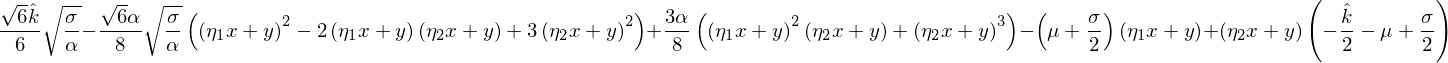

In [122]:
vprime_subst = vprime.subs(v,eta_1*x+y).subs(w,eta_2*x+y)
vprime_subst

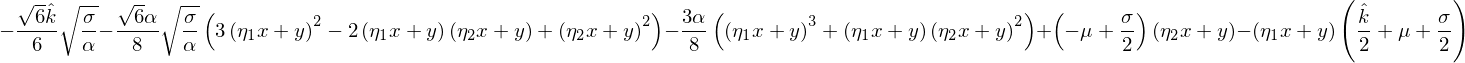

In [123]:
wprime_subst=wprime.subs(v,eta_1*x+y).subs(w,eta_2*x+y)
wprime_subst

Then rotating by premultiplying (I'm doing this a row at a time). 

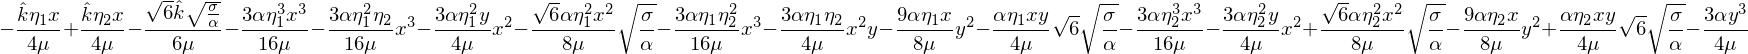

In [124]:
x_prime = (-vprime_subst+wprime_subst)/2/mu
x_prime.expand()

Calculating term by term in the Jacobian matrix (A). I could have done this in a code. For future.

In [125]:
Jxx = x_prime.expand().coeff(x).subs(x,0).subs(y,0).subs(khat,0)

In [126]:
Jxy = x_prime.expand().coeff(y).subs(x,0).subs(y,0).subs(khat,0)

In [127]:
Jxk = x_prime.expand().coeff(khat).subs(x,0).subs(y,0).subs(khat,0)

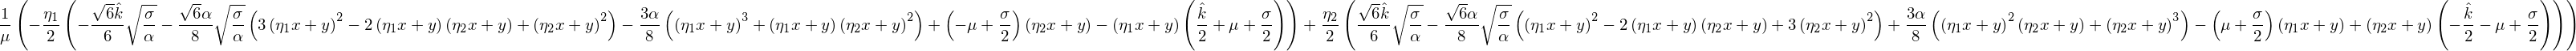

In [128]:
y_prime = (eta_2*vprime_subst-eta_1*wprime_subst)/2/mu
y_prime

In [129]:
Jyx = y_prime.expand().coeff(x).subs(x,0).subs(y,0).subs(khat,0)
Jyx = Jyx.subs({eta_1: -mu+sigma/2,eta_2:mu+sigma/2}).simplify()
Jyx

In [130]:
Jyy = y_prime.expand().coeff(y).subs(x,0).subs(y,0).subs(khat,0)

In [131]:
Jyk = y_prime.expand().coeff(khat).subs(x,0).subs(y,0).subs(khat,0)

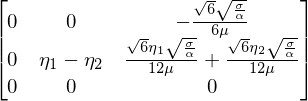

In [132]:
J = Matrix([[Jxx, Jxy, Jxk],[Jyx, Jyy, Jyk],[0,0,0]])
J

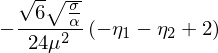

In [133]:
a = -(Jxk + Jyk)/(Jxy+Jyy)# Here we are assuming a vector of the form [0 a 1] and solving for a
a.simplify().subs(eta_1-eta_2,-2*mu)

Next we apply
$$D_{\mathbf{v}_c}\mathbf{h}(\mathbf{v}_c)\dot{\mathbf{v}}_c = \dot{\mathbf{v}}_s$$

Here $[x,\,\hat{k}]=\mathbf{v}_c$ and $y=v_s$
which for this example means

$$D_{x}h(x,\hat{k})x'+D_{\hat{k}}h(x,\hat{k})\hat{k}' = y'$$
where 
$$y = h(x,\hat{k}) = b_1\hat{k}+ b_2 x^2+\cdots$$

Since $\hat{k}'=0$, this simplifies to

$$D_{x}h(x,\hat{k})x' = y'$$

In [134]:
diff(b_1* khat+b_2*x**2,x)# this is y = h(x, khat)

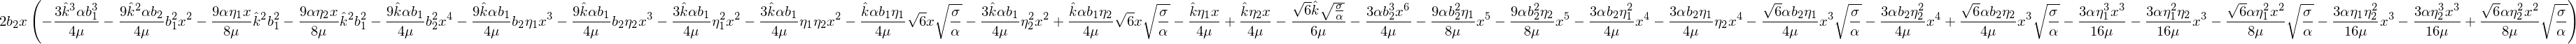

In [135]:
lhs = diff(b_1* khat+b_2*x**2,x)*x_prime.subs(y,b_1* khat+b_2*x**2).expand()
lhs

In [136]:
diff(lhs,x,x).subs(x,0).subs(khat,0)/2 #terms in x^2

In [137]:
diff(lhs,khat).subs(x,0).subs(khat,0) # terms in khat

In [138]:
hofx = b_1* khat+b_2*x**2 #should have defined and used this earlier

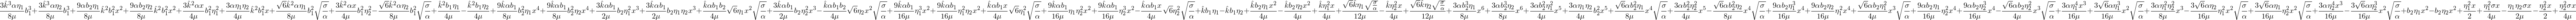

In [139]:
rhs = y_prime.subs(y,hofx).expand()
rhs

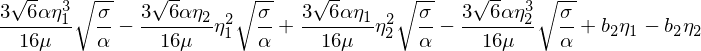

In [140]:
eqn1 = diff(rhs,x,x).subs(x,0).subs(khat,0)/2 #terms in x^2
eqn1

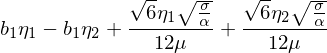

In [141]:
eqn2 = diff(rhs,khat).subs(x,0).subs(khat,0) #terms in khat
eqn2

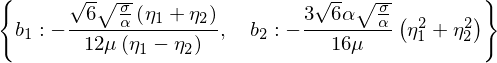

In [142]:
solns = solve((eqn1,eqn2),b_1,b_2) #solving for the coefficients (left side  of eqns is zero)
solns

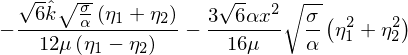

In [143]:
hofx.subs(solns)

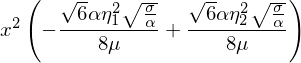

In [144]:
x_prime.subs(y,hofx.subs(solns)).expand().coeff(x**2).subs(khat,0)*x**2

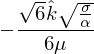

In [145]:
x_prime.subs(y,hofx.subs(solns)).expand().coeff(khat).subs(x,0)*khat

In [146]:
omega, alpha_1, alpha_3, A_1 = symbols("omega alpha_1 alpha_3 A_1", real = True)

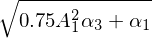

In [147]:
omega=sqrt(alpha_1+3/4*alpha_3*(A_1)**2)
omega

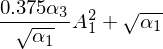

In [148]:
omega.subs(A_1,0)+diff(omega,A_1).subs(A_1,0)*A_1+1/2*diff(omega,A_1,A_1).subs(A_1,0)*A_1**2